# 1. Предобработка данных

## 1.1 Подгрузка и открытие датасета

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df_X_bp=pd.read_csv('X_bp.csv')
df_X_bp

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,0,"1,857142857",2030,"738,7368421",30,"22,26785714",100,210,70,3000,220
1,1,"1,857142857",2030,"738,7368421",50,"23,75","284,6153846",210,70,3000,220
2,2,"1,857142857",2030,"738,7368421","49,9",33,"284,6153846",210,70,3000,220
3,3,"1,857142857",2030,"738,7368421",129,"21,25",300,210,70,3000,220
4,4,"2,771331058",2030,753,"111,86","22,26785714","284,6153846",210,70,3000,220
...,...,...,...,...,...,...,...,...,...,...,...
1018,1018,"2,271346377","1952,087902","912,855545","86,99218257","20,12324867","324,774576","209,1986996","73,09096083","2387,292495","125,0076686"
1019,1019,"3,444022328","2050,089171","444,7326336","145,9819782","19,59976869","254,2154008","350,66083","72,92082684","2360,392784","117,7300986"
1020,1020,"3,280604476","1972,372865","416,8365235","110,5334774","23,95750159","248,4230469","740,142791","74,7343437","2662,90604","236,6067641"
1021,1021,"3,705351215","2066,799773","741,4755167","141,3979628","19,24694474","275,7798396","641,4681522","74,04270842","2071,715856","197,1260667"


In [3]:
df_X_nup=pd.read_csv('X_nup.csv')
df_X_nup

,Unnamed: 0,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0,0,4,57
1,1,0,4,60
2,2,0,4,70
3,3,0,5,47
4,4,0,5,57
...,...,...,...,...
1035,1035,90,"8,088110993","47,75917659"
1036,1036,90,"7,619137864","66,93193235"
1037,1037,90,"9,800925693","72,85828626"
1038,1038,90,"10,07985856","65,5194794"


In [4]:
summary = {
    "bp": {"shape": df_X_bp.shape, "columns": df_X_bp.columns.tolist(), "index_is_unique": df_X_bp.index.is_unique},
    "nup": {"shape": df_X_nup.shape, "columns": df_X_nup.columns.tolist(), "index_is_unique": df_X_nup.index.is_unique},
}
summary

{'bp': {'shape': (1023, 11),
  'columns': ['Unnamed: 0',
   'Соотношение матрица-наполнитель',
   'Плотность, кг/м3',
   'модуль упругости, ГПа',
   'Количество отвердителя, м.%',
   'Содержание эпоксидных групп,%_2',
   'Температура вспышки, С_2',
   'Поверхностная плотность, г/м2',
   'Модуль упругости при растяжении, ГПа',
   'Прочность при растяжении, МПа',
   'Потребление смолы, г/м2'],
  'index_is_unique': True},
 'nup': {'shape': (1040, 4),
  'columns': ['Unnamed: 0',
   'Угол нашивки, град',
   'Шаг нашивки',
   'Плотность нашивки'],
  'index_is_unique': True}}

По итогам были погруженны 2 файла датасета.Перывый содержит 1023 строки и 11 столбцов , второй 1040 строк и 4 столбца.

## 1.2 Объединение датасетов

In [5]:
def maybe_set_index(df: pd.DataFrame) -> pd.DataFrame:
    """
    Если текущий индекс неуникален, а первая колонка уникальна — делаем её индексом.
    """
    first_col = df.columns[0]
    if df[first_col].is_unique:
        return df.set_index(first_col)

In [6]:
df_X_bp = maybe_set_index(df_X_bp)
df_X_bp

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
Unnamed: 0,,,,,,,,,,
0,"1,857142857",2030,"738,7368421",30,"22,26785714",100,210,70,3000,220
1,"1,857142857",2030,"738,7368421",50,"23,75","284,6153846",210,70,3000,220
2,"1,857142857",2030,"738,7368421","49,9",33,"284,6153846",210,70,3000,220
3,"1,857142857",2030,"738,7368421",129,"21,25",300,210,70,3000,220
4,"2,771331058",2030,753,"111,86","22,26785714","284,6153846",210,70,3000,220
...,...,...,...,...,...,...,...,...,...,...
1018,"2,271346377","1952,087902","912,855545","86,99218257","20,12324867","324,774576","209,1986996","73,09096083","2387,292495","125,0076686"
1019,"3,444022328","2050,089171","444,7326336","145,9819782","19,59976869","254,2154008","350,66083","72,92082684","2360,392784","117,7300986"
1020,"3,280604476","1972,372865","416,8365235","110,5334774","23,95750159","248,4230469","740,142791","74,7343437","2662,90604","236,6067641"


In [7]:
df_X_nup = maybe_set_index(df_X_nup)
df_X_nup

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
Unnamed: 0,,,
0,0,4,57
1,0,4,60
2,0,4,70
3,0,5,47
4,0,5,57
...,...,...,...
1035,90,"8,088110993","47,75917659"
1036,90,"7,619137864","66,93193235"
1037,90,"9,800925693","72,85828626"


In [8]:
df=df_X_bp.join(df_X_nup,how='inner')
df

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
Unnamed: 0,,,,,,,,,,,,,
0,"1,857142857",2030,"738,7368421",30,"22,26785714",100,210,70,3000,220,0,4,57
1,"1,857142857",2030,"738,7368421",50,"23,75","284,6153846",210,70,3000,220,0,4,60
2,"1,857142857",2030,"738,7368421","49,9",33,"284,6153846",210,70,3000,220,0,4,70
3,"1,857142857",2030,"738,7368421",129,"21,25",300,210,70,3000,220,0,5,47
4,"2,771331058",2030,753,"111,86","22,26785714","284,6153846",210,70,3000,220,0,5,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,"2,271346377","1952,087902","912,855545","86,99218257","20,12324867","324,774576","209,1986996","73,09096083","2387,292495","125,0076686",90,"9,076380351","47,01977047"
1019,"3,444022328","2050,089171","444,7326336","145,9819782","19,59976869","254,2154008","350,66083","72,92082684","2360,392784","117,7300986",90,"10,56561397","53,75078969"
1020,"3,280604476","1972,372865","416,8365235","110,5334774","23,95750159","248,4230469","740,142791","74,7343437","2662,90604","236,6067641",90,"4,161153983","67,62968415"


Переведён столбец с уникальным значением ,как индекс таблицы.Произведенно оъединение двух таблиц по индексу.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Соотношение матрица-наполнитель       1023 non-null   object
 1   Плотность, кг/м3                      1023 non-null   object
 2   модуль упругости, ГПа                 1023 non-null   object
 3   Количество отвердителя, м.%           1023 non-null   object
 4   Содержание эпоксидных групп,%_2       1023 non-null   object
 5   Температура вспышки, С_2              1023 non-null   object
 6   Поверхностная плотность, г/м2         1023 non-null   object
 7   Модуль упругости при растяжении, ГПа  1023 non-null   object
 8   Прочность при растяжении, МПа         1023 non-null   object
 9   Потребление смолы, г/м2               1023 non-null   object
 10  Угол нашивки, град                    1023 non-null   int64 
 11  Шаг нашивки                        

В объединённом датасете содержится 1023 записи и 13 признаков, при этом почти все столбцы хранятся в текстовом формате (object) и требуют преобразования в числовой тип для дальнейшего анализа и обучения моделей.

In [10]:
df.isna().sum()

,0
Соотношение матрица-наполнитель,0
"Плотность, кг/м3",0
"модуль упругости, ГПа",0
"Количество отвердителя, м.%",0
"Содержание эпоксидных групп,%_2",0
"Температура вспышки, С_2",0
"Поверхностная плотность, г/м2",0
"Модуль упругости при растяжении, ГПа",0
"Прочность при растяжении, МПа",0
"Потребление смолы, г/м2",0


Пропуски в датасете отсутствуют.

In [11]:
df.index.name=None

df=df[['Соотношение матрица-наполнитель','Плотность, кг/м3','модуль упругости, ГПа','Количество отвердителя, м.%','Содержание эпоксидных групп,%_2','Температура вспышки, С_2','Поверхностная плотность, г/м2','Модуль упругости при растяжении, ГПа','Прочность при растяжении, МПа','Потребление смолы, г/м2','Угол нашивки, град','Шаг нашивки','Плотность нашивки']]
df.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,"1,857142857",2030,"738,7368421",30,"22,26785714",100,210,70,3000,220,0,4,57
1,"1,857142857",2030,"738,7368421",50,"23,75","284,6153846",210,70,3000,220,0,4,60
2,"1,857142857",2030,"738,7368421","49,9",33,"284,6153846",210,70,3000,220,0,4,70
3,"1,857142857",2030,"738,7368421",129,"21,25",300,210,70,3000,220,0,5,47
4,"2,771331058",2030,753,"111,86","22,26785714","284,6153846",210,70,3000,220,0,5,57


##1.3 Перевод типов данных

In [12]:
for column in df.columns:
  if df[column].dtype=="object":
    df[column]=pd.to_numeric(df[column].astype(str).str.replace(',','.',regex=False))
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки           

Все категориальные переменные переведены в дробные значения.

##1.4 Анализ выбросов

In [13]:
df.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144,44.252199,6.899222,57.153929
std,0.913222,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,3.118983,485.628006,59.735931,45.015793,2.563467,12.350969
min,0.389403,1731.764635,2.436909,17.740275,14.254986,100.000000,0.603740,64.054061,1036.856605,33.803026,0.000000,0.000000,0.000000
25%,2.317887,1924.155466,500.047452,92.443497,20.608034,259.066528,266.816645,71.245018,2135.850448,179.627520,0.000000,5.080033,49.799212
50%,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882,0.000000,6.916144,57.341920
75%,3.552660,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,75.356612,2767.193119,257.481724,90.000000,8.586293,64.944961
max,5.591742,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,3848.436732,414.590628,90.000000,14.440522,103.988901


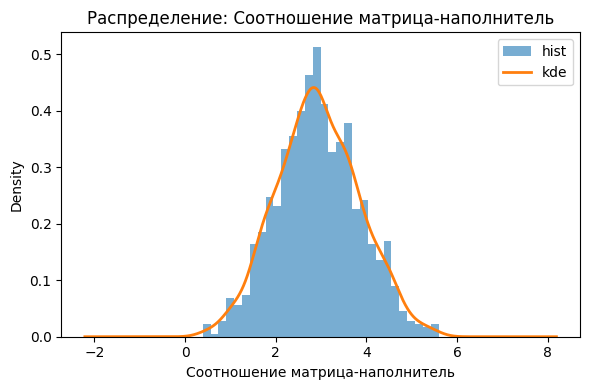

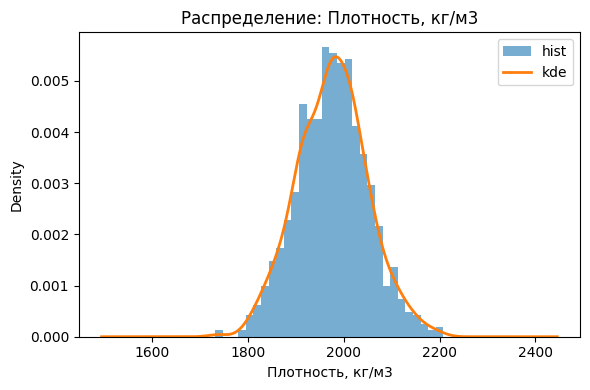

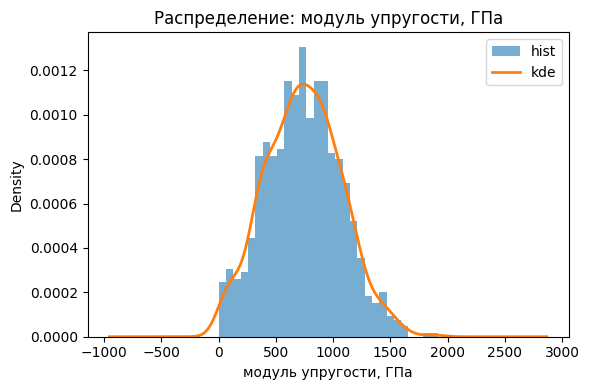

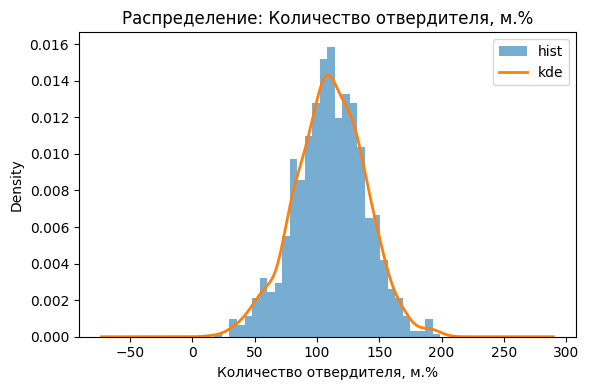

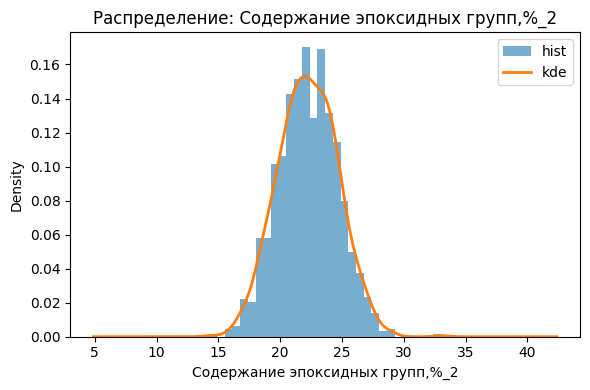

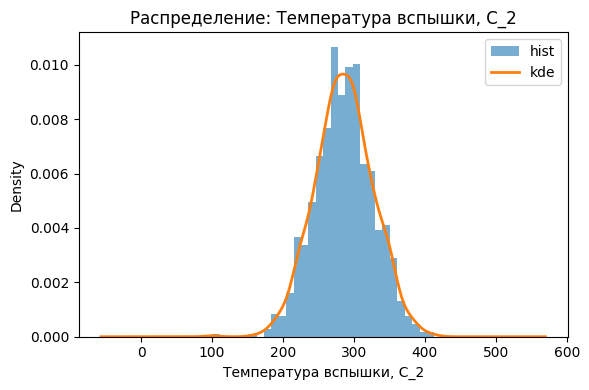

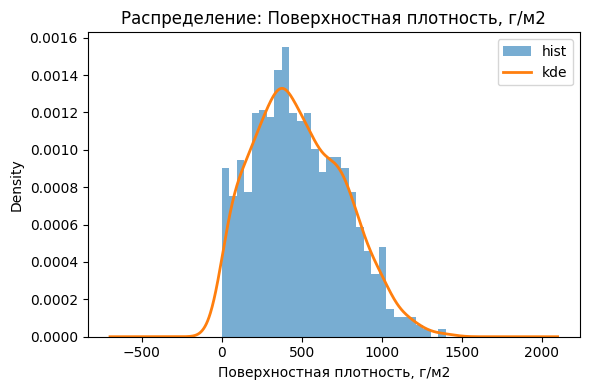

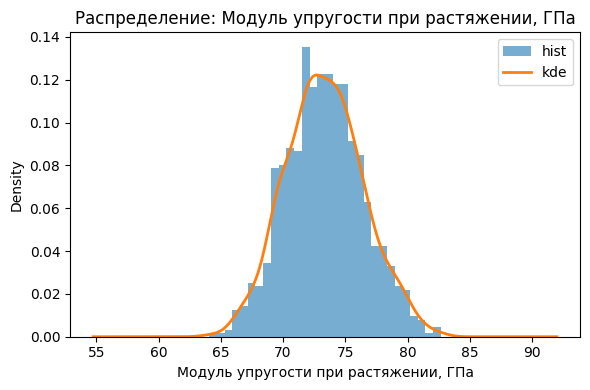

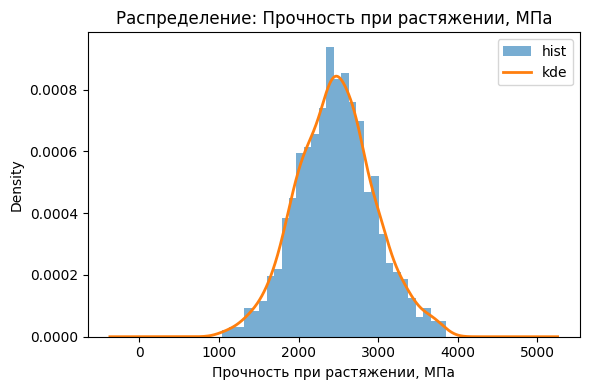

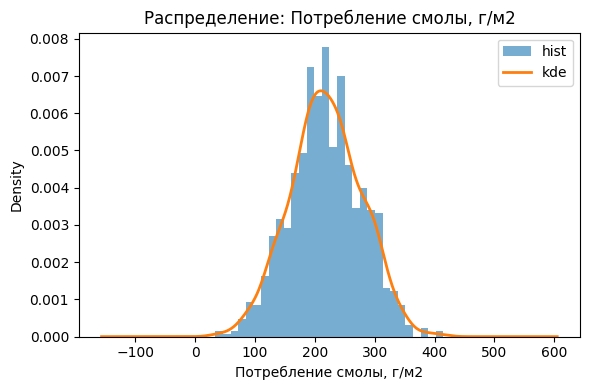

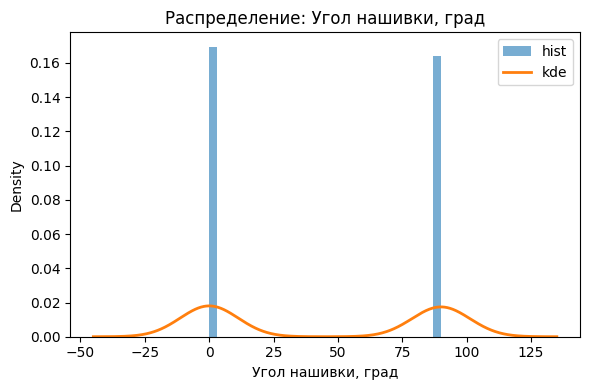

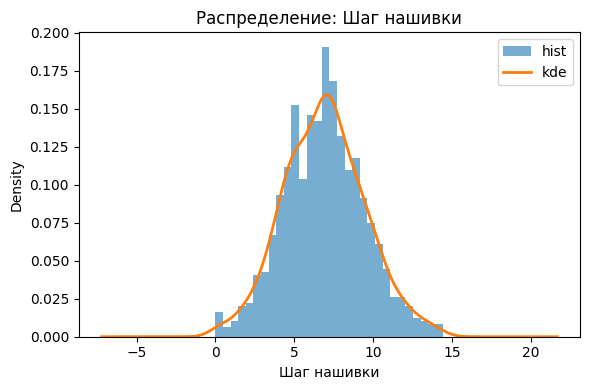

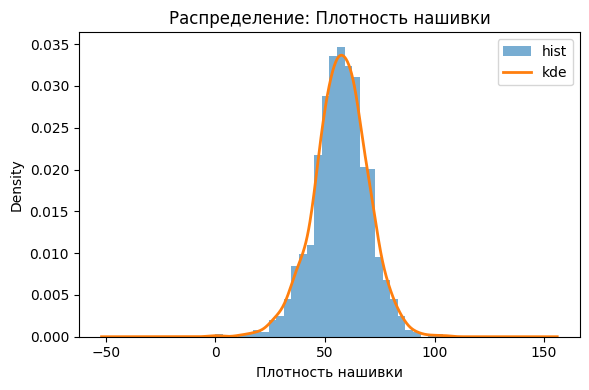

In [14]:
num_cols = [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c])]
assert len(num_cols) > 0, "Нет числовых колонок после преобразования."

for c in num_cols:
    plt.figure(figsize=(6, 4))
    df[c].dropna().plot(kind="hist", bins=30, alpha=0.6, density=True, label="hist")
    df[c].dropna().plot(kind="kde", label="kde", linewidth=2)
    plt.title(f"Распределение: {c}")
    plt.xlabel(c)
    plt.ylabel("Density")
    plt.legend()
    plt.tight_layout()
    plt.show()

Распределение все числовых признаком близки к нормальному виду ,однако имеют различную ширину и отдельные сдвиги,что указывает на разный масштаб и наличие выбросов.

In [15]:
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# маска выбросов по каждой колонке
outlier_flags = pd.DataFrame(index=df.index)
for c in num_cols:
    if pd.isna(IQR[c]) or IQR[c] == 0:
        outlier_flags[c] = pd.Series(False, index=df.index)  # признак константный — без выбросов
    else:
        lo = Q1[c] - 1.5 * IQR[c]
        hi = Q3[c] + 1.5 * IQR[c]
        outlier_flags[c] = (df[c] < lo) | (df[c] > hi)

outlier_df = pd.DataFrame(outlier_flags)
outlier_counts = outlier_df.sum().sort_values(ascending=False)

outlier_counts

,0
Плотность нашивки,21
"Количество отвердителя, м.%",14
"Прочность при растяжении, МПа",11
"Плотность, кг/м3",9
"Потребление смолы, г/м2",8
"Температура вспышки, С_2",8
"Модуль упругости при растяжении, ГПа",6
Соотношение матрица-наполнитель,6
Шаг нашивки,4
"Содержание эпоксидных групп,%_2",2


Наибольшее количество выбросов имеет колонка "Плотность нашивки", а в колонке "Угол нашивки, град" выбросы вовсе отсутсвуют. Количество выбросов во всех признаках незначительно и не оказывает существенного влияния на распределения данных.

In [16]:
mask_any_outlier = outlier_flags.any(axis=1)
n_outliers = int(mask_any_outlier.sum())
df_clean = df.loc[~mask_any_outlier].copy()
print(f"После очистки осталось: {len(df_clean)} строк")
df_clean.head()

После очистки осталось: 936 строк


,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0
5,2.767918,2000.0,748.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,60.0
6,2.569620,1910.0,807.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,70.0


Выбросы отчищены, всего осталось 936 строк

Boxplot(яшик с усами)

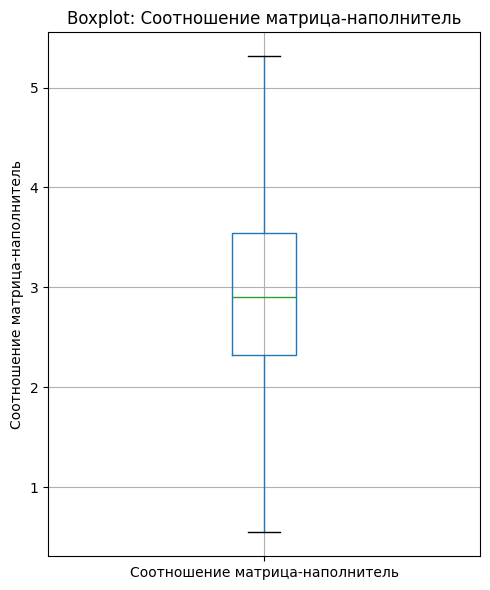

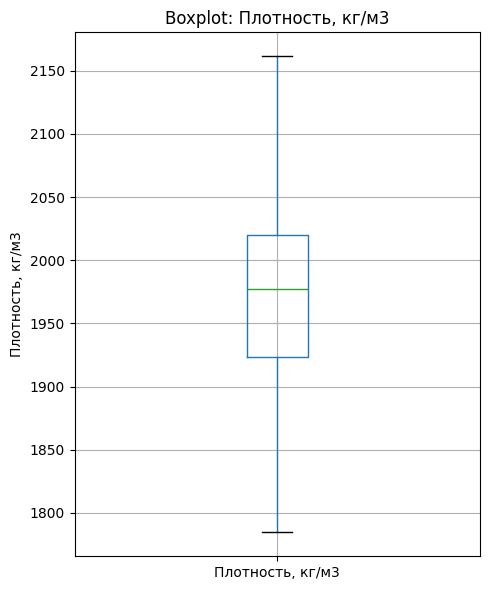

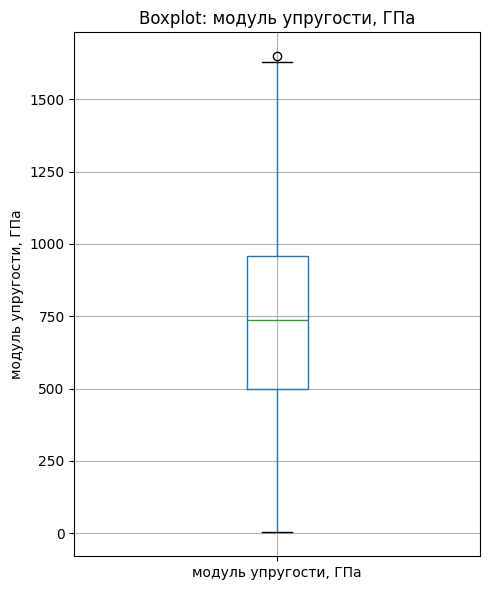

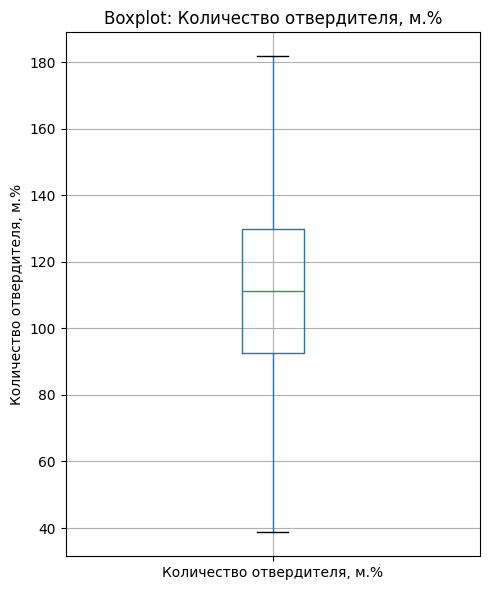

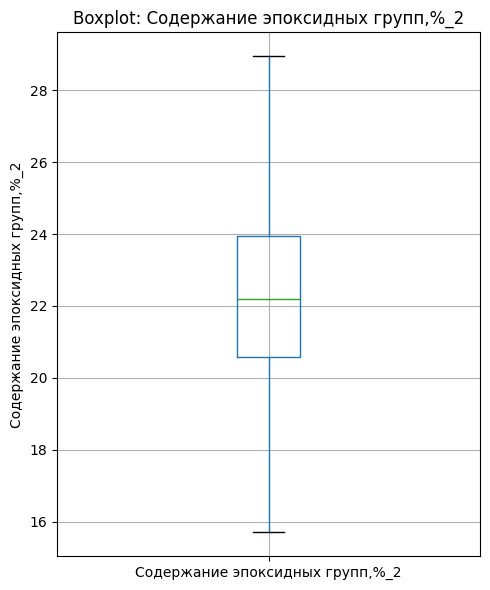

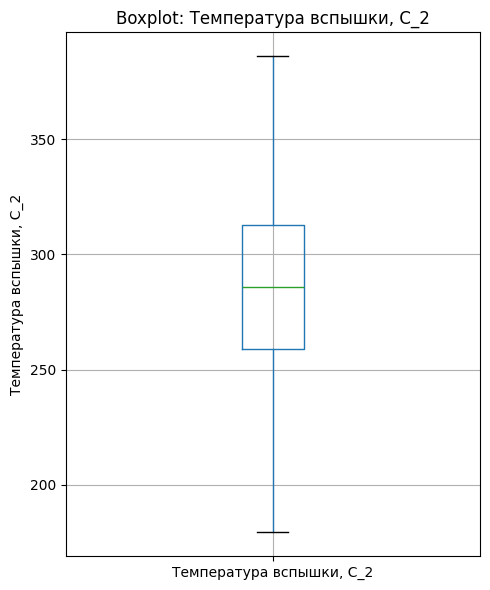

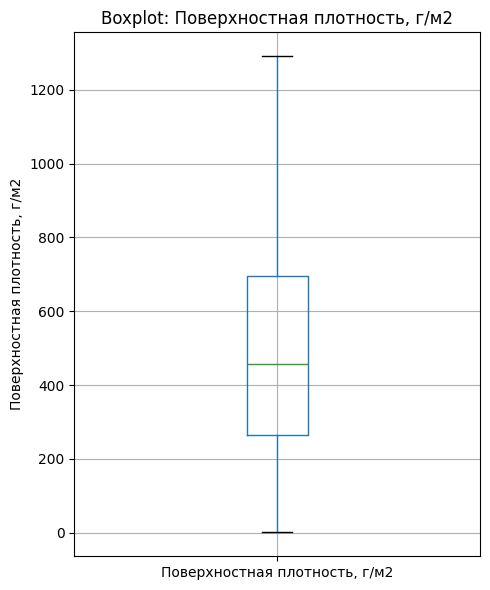

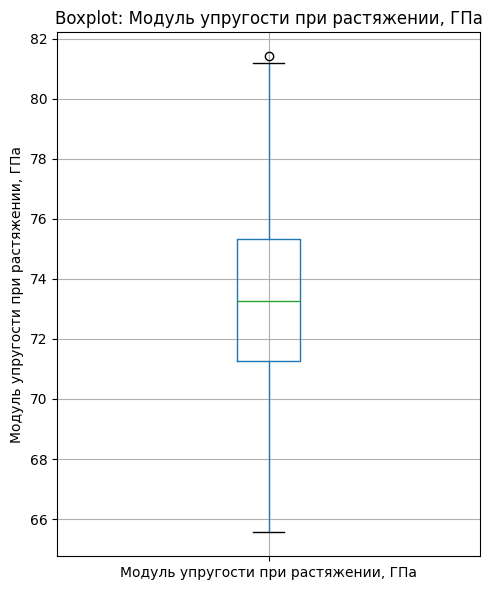

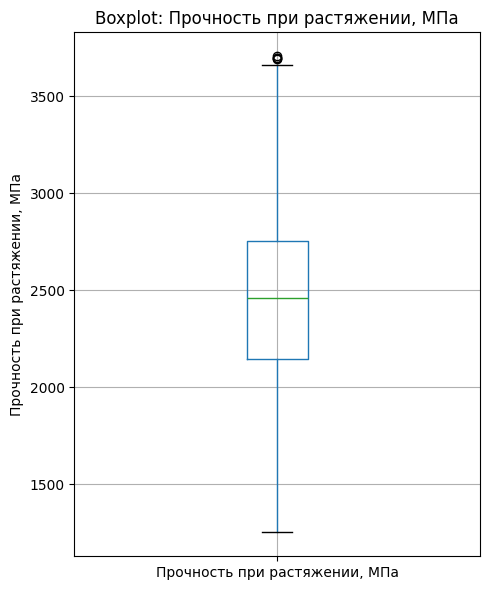

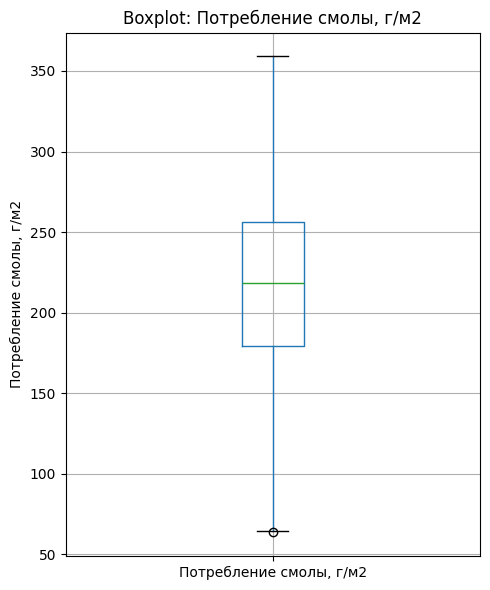

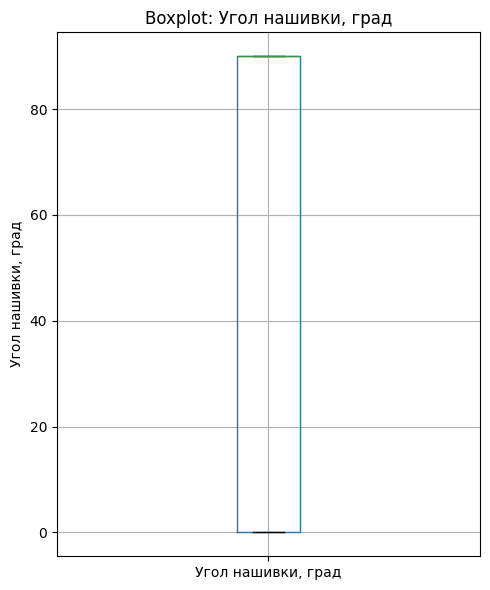

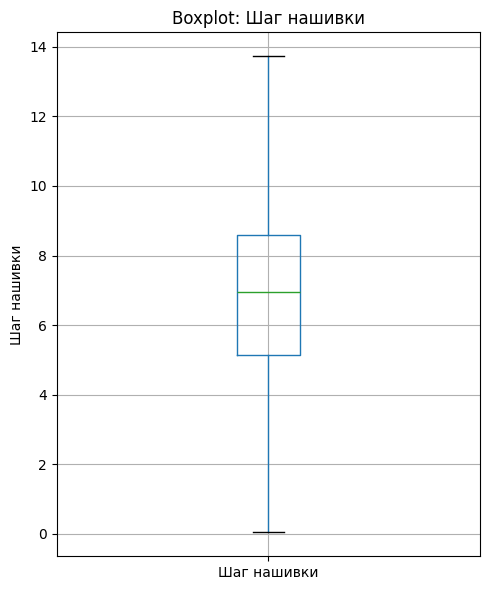

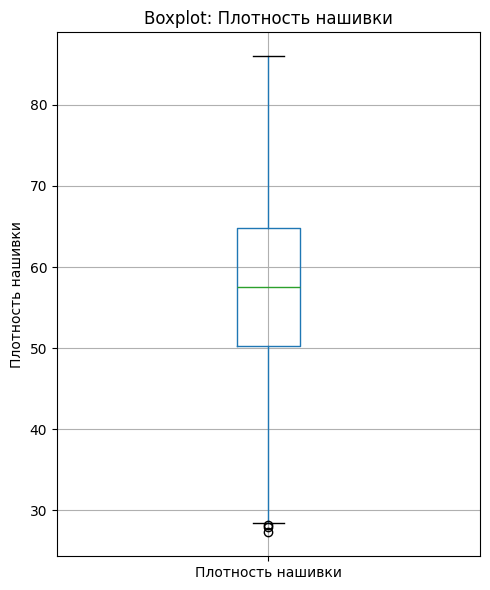

In [17]:
for c in num_cols:
    plt.figure(figsize=(5, 6))
    df_clean.boxplot(column=c)
    plt.title(f"Boxplot: {c}")
    plt.ylabel(c)
    plt.tight_layout()
    plt.show()

## 1.5 Визуальное отображение

/tmp/ipython-input-1500320158.py:13: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


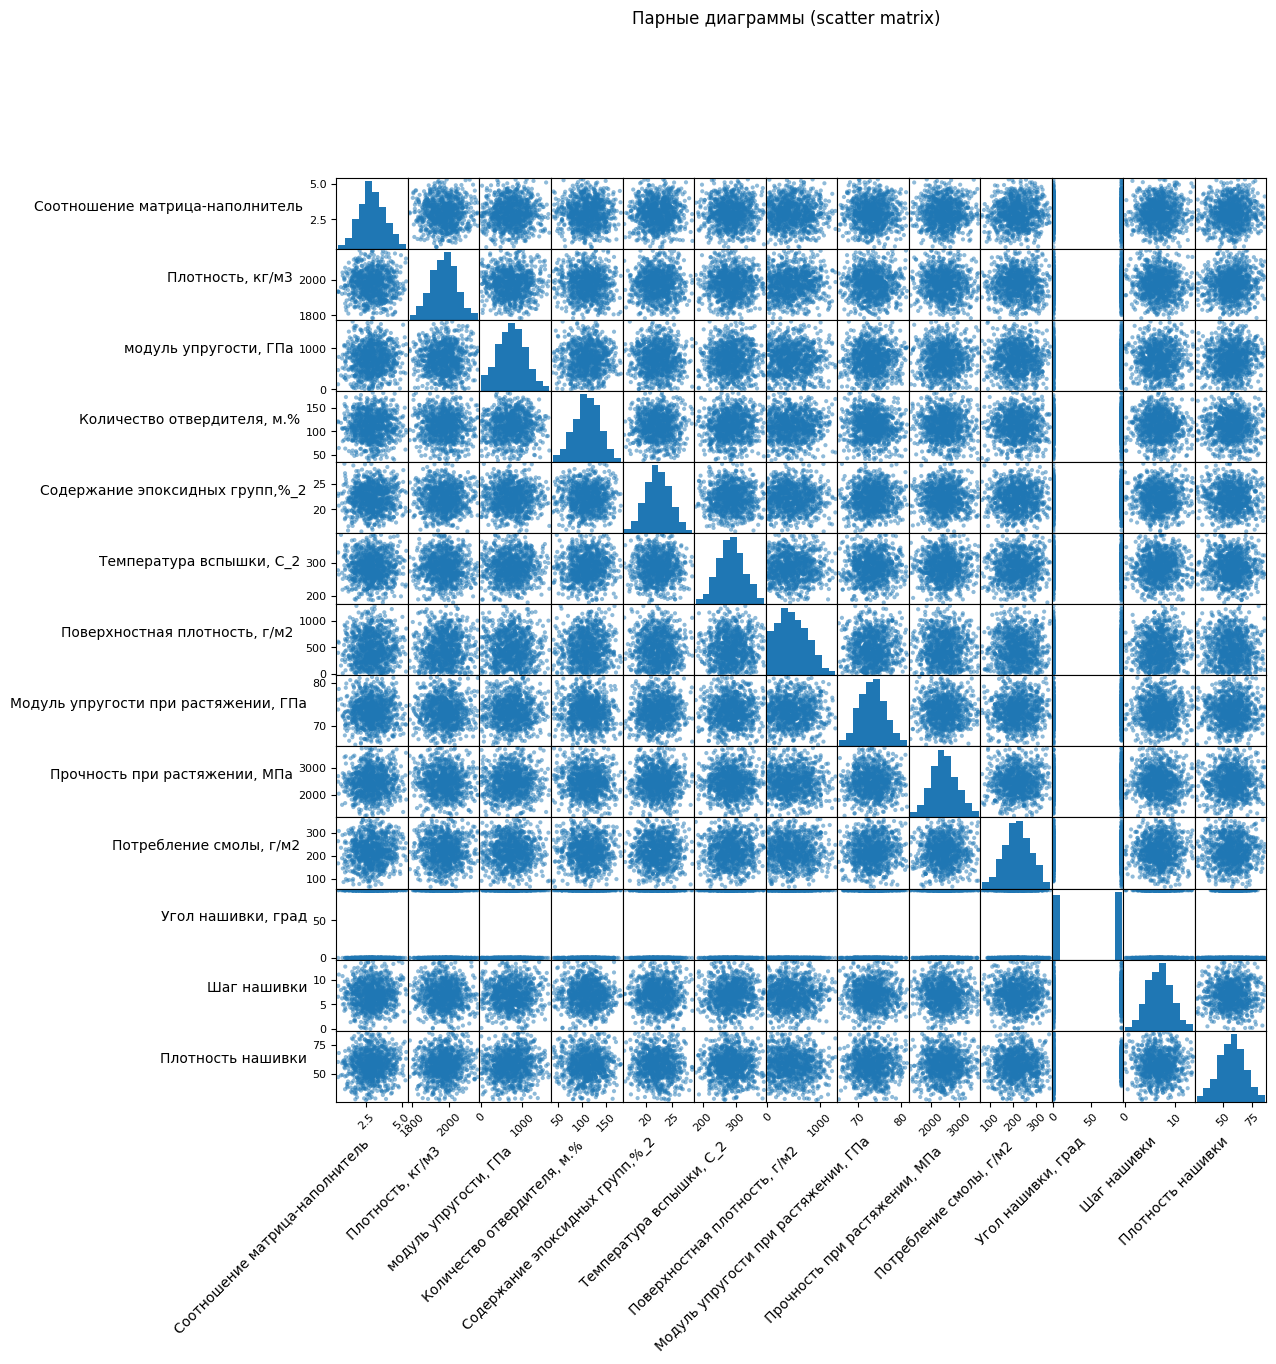

In [18]:
from pandas.plotting import scatter_matrix
axs = scatter_matrix(df_clean, figsize=(12,12), diagonal='hist')

for ax in axs.ravel():
    ax.xaxis.label.set_rotation(45)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
    ax.xaxis.label.set_ha('right')
    ax.tick_params(axis='x', labelrotation=45, labelsize=8)
    ax.tick_params(axis='y', labelsize=8)

plt.suptitle("Парные диаграммы (scatter matrix)", y=1.02)
plt.tight_layout()
plt.show()

Диаграмма показывает, что большинство признаков в данных имеют слабую изменчивость и не демонстрируют выраженной корреляции между собой.

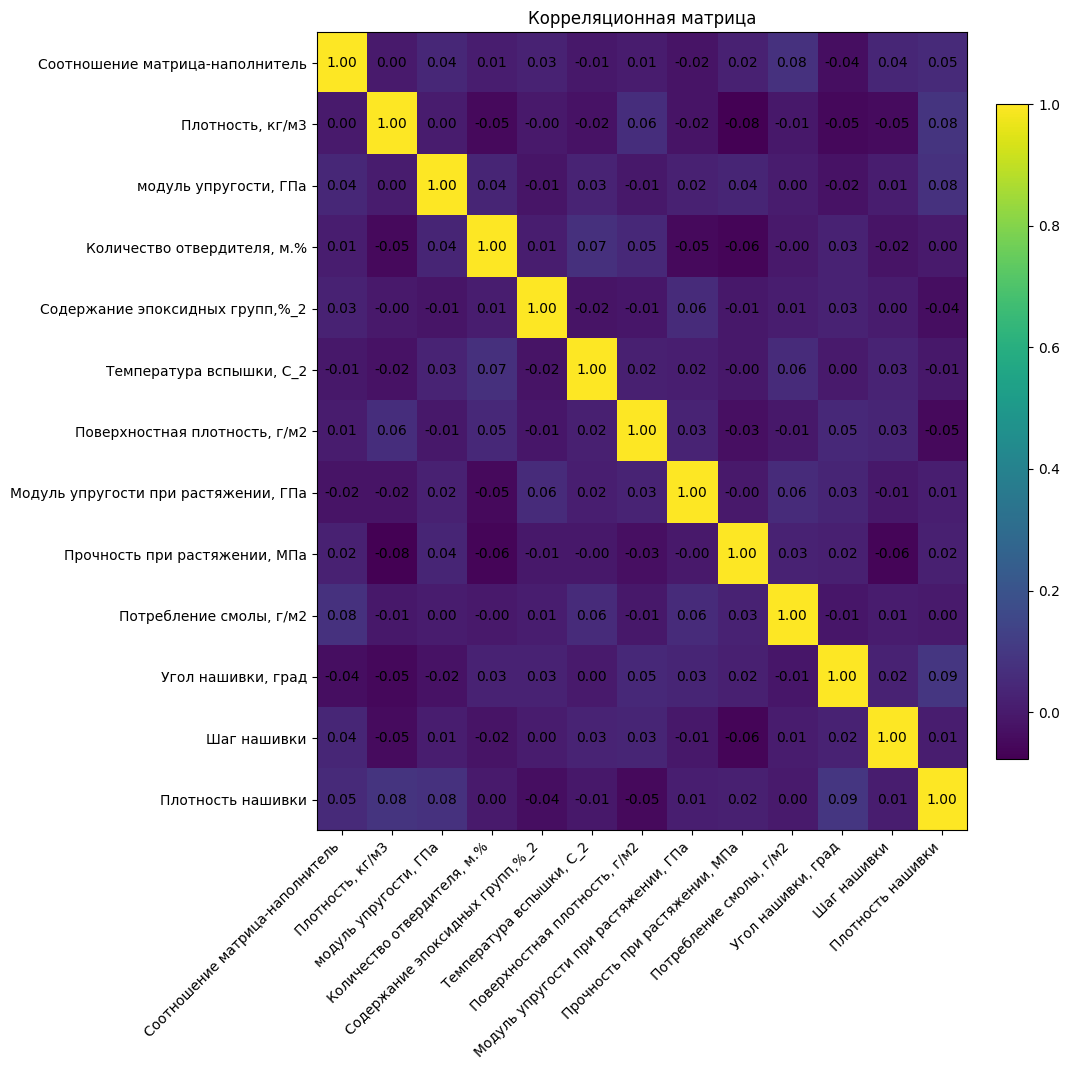

In [19]:
corr = df_clean[num_cols].corr(numeric_only=True)
plt.figure(figsize=(0.6*len(num_cols)+3, 0.6*len(num_cols)+3))
im = plt.imshow(corr, aspect='auto')
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha="right")
plt.yticks(range(len(corr.index)), corr.index)
plt.title("Корреляционная матрица")
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        val = corr.iloc[i, j]
        plt.text(j, i, f"{val:.2f}", ha='center', va='center')
plt.tight_layout()
plt.show()

На представленной корреляционной матрице видно, что ни один из признаков не имеет заметной (|r| > 0.5) линейной связи с другими, то есть все признаки слабо коррелируют между собой, что указывает на отсутствие сильных линейных зависимостей и низкий риск мультиколлинеарности в модели.

##1.6 Стандартизация

In [20]:

# from sklearn.preprocessing import StandardScaler

# numeric_cols = df_clean.select_dtypes(include=["int64", "float64"]).columns

# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(df_clean[numeric_cols])

# df_scaled = pd.DataFrame(scaled_data, columns=numeric_cols)

# print("Первые строки после стандартизации:")
# df_scaled.head()
df_scaled=df_clean

Стандартизация была выполнена, чтобы привести все признаки к единому масштабу и исключить влияние разных единиц измерения, в результате чего каждый признак получил среднее значение 0 и дисперсию 1, что позволяет корректно сравнивать их и использовать в моделях.

# 2 Разработка и обучение модели

## 2.1 Обучение моделей

In [86]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

In [87]:
RANDOM_STATE=42

In [88]:
targets = [
    "Модуль упругости при растяжении, ГПа",
    "Прочность при растяжении, МПа",
]

In [89]:
features = [c for c in df.columns if c not in targets]

In [90]:
!pip install catboost

In [91]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.neural_network import MLPRegressor


In [92]:


# Сетки гиперпараметров
param_grids = {
    "LinearRegression": {},
    "Ridge": {"alpha": np.logspace(-3, 3, 7)},
    "Lasso": {"alpha": np.logspace(-3, 1, 9)},
    "RandomForest": {
        "n_estimators": [100, 300],
        "max_depth": [None, 5, 10],
    },
    "GradientBoosting": {
        "n_estimators": [100, 300],
        "learning_rate": [0.05, 0.1, 0.2],
        "max_depth": [2, 3, 4],
    },
    "SVR": {
        "kernel": ["rbf", "linear"],
        "C": [0.1, 1, 10],
        "epsilon": [0.01, 0.1, 0.5],
    },
    "XGBoost": {
        "n_estimators": [100, 300],
        "learning_rate": [0.05, 0.1, 0.2],
        "max_depth": [3, 5, 7],
        "subsample": [0.8, 1.0],
        "colsample_bytree": [0.8, 1.0],
    },
    "LightGBM": {
        "n_estimators": [100, 300],
        "learning_rate": [0.05, 0.1, 0.2],
        "num_leaves": [15, 31, 63],
        "max_depth": [-1, 5, 10],
    },
    "CatBoost": {
        "iterations": [200, 500],
        "learning_rate": [0.05, 0.1, 0.2],
        "depth": [4, 6, 8],
    },
    "KNN": {
        "n_neighbors": [3, 5, 7, 11],
        "weights": ["uniform", "distance"],
        "p": [1, 2],  # 1 = манхэттен, 2 = евклид
    },
    "BayesianRidge": {
        "alpha_1": [1e-6, 1e-5, 1e-4],
        "alpha_2": [1e-6, 1e-5, 1e-4],
    },
    "MLP": {
        "hidden_layer_sizes": [(50,), (100,), (50, 50)],
        "activation": ["relu", "tanh"],
        "solver": ["adam"],
        "learning_rate_init": [0.001, 0.01],
        "max_iter": [500],
    },
}

# Модели
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(random_state=RANDOM_STATE),
    "Lasso": Lasso(random_state=RANDOM_STATE, max_iter=5000),
    "RandomForest": RandomForestRegressor(random_state=RANDOM_STATE),
    "GradientBoosting": GradientBoostingRegressor(random_state=RANDOM_STATE),
    "SVR": SVR(),
    "XGBoost": XGBRegressor(random_state=RANDOM_STATE, verbosity=0),
    "LightGBM": LGBMRegressor(random_state=RANDOM_STATE),
    "CatBoost": CatBoostRegressor(random_state=RANDOM_STATE, verbose=0),
    "KNN": KNeighborsRegressor(),
    "BayesianRidge": BayesianRidge(),
    "MLP": MLPRegressor(random_state=RANDOM_STATE, max_iter=500),
}

In [93]:
def RMSE(y_true,y_pred):
  return np.sqrt(mean_squared_error(y_true,y_pred))

In [94]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [95]:
results=[]
for target in targets:
  print(f"\n=== Целевая переменная: {target} ===")
  X=df_scaled[features].values
  y=df_scaled[target].values
  X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30,  random_state=RANDOM_STATE
  )
  for name_model in models:
      model=models[name_model]
      grid=param_grids[name_model]
      gs=GridSearchCV(estimator=model,param_grid=grid,cv=10,scoring='neg_root_mean_squared_error',n_jobs=-1)
      gs.fit(X_train,y_train)
      y_train_predict=gs.predict(X_train)
      y_test_predict=gs.predict(X_test)
      res = {
            "target": target,
            "model": name_model,
            "best_params": gs.best_params_,
            "train_RMSE": RMSE(y_train, y_train_predict),
            "test_RMSE": RMSE(y_test, y_test_predict),
            "train_MAE": mean_absolute_error(y_train, y_train_predict),
            "test_MAE": mean_absolute_error(y_test, y_test_predict),
            "train_R2": r2_score(y_train, y_train_predict),
            "test_R2": r2_score(y_test, y_test_predict),
      }
      results.append(res)
      print(f"{name_model:>16} | best params: {gs.best_params_} | test RMSE: {res['test_RMSE']:.4f} | test R²: {res['test_R2']:.4f}")



=== Целевая переменная: Модуль упругости при растяжении, ГПа ===
LinearRegression | best params: {} | test RMSE: 2.9573 | test R²: -0.0036
           Ridge | best params: {'alpha': np.float64(1000.0)} | test RMSE: 2.9557 | test R²: -0.0025
           Lasso | best params: {'alpha': np.float64(10.0)} | test RMSE: 2.9714 | test R²: -0.0132
    RandomForest | best params: {'max_depth': 5, 'n_estimators': 100} | test RMSE: 2.9685 | test R²: -0.0112
GradientBoosting | best params: {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100} | test RMSE: 2.9501 | test R²: 0.0013
             SVR | best params: {'C': 0.1, 'epsilon': 0.5, 'kernel': 'rbf'} | test RMSE: 2.9717 | test R²: -0.0134
         XGBoost | best params: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8} | test RMSE: 2.9870 | test R²: -0.0238
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000102 seconds.
You can set `force_col_wis

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


        CatBoost | best params: {'depth': 4, 'iterations': 200, 'learning_rate': 0.05} | test RMSE: 2.9760 | test R²: -0.0163
             KNN | best params: {'n_neighbors': 11, 'p': 1, 'weights': 'distance'} | test RMSE: 3.0625 | test R²: -0.0763
   BayesianRidge | best params: {'alpha_1': 1e-06, 'alpha_2': 0.0001} | test RMSE: 2.9694 | test R²: -0.0118
             MLP | best params: {'activation': 'tanh', 'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.01, 'max_iter': 500, 'solver': 'adam'} | test RMSE: 2.9542 | test R²: -0.0015

=== Целевая переменная: Прочность при растяжении, МПа ===
LinearRegression | best params: {} | test RMSE: 461.9324 | test R²: -0.0454
           Ridge | best params: {'alpha': np.float64(1000.0)} | test RMSE: 460.6044 | test R²: -0.0394
           Lasso | best params: {'alpha': np.float64(10.0)} | test RMSE: 461.1380 | test R²: -0.0419
    RandomForest | best params: {'max_depth': 5, 'n_estimators': 300} | test RMSE: 464.4450 | test R²: -0.0568
Grad

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


        CatBoost | best params: {'depth': 4, 'iterations': 200, 'learning_rate': 0.05} | test RMSE: 463.5650 | test R²: -0.0528
             KNN | best params: {'n_neighbors': 11, 'p': 2, 'weights': 'uniform'} | test RMSE: 466.8196 | test R²: -0.0677
   BayesianRidge | best params: {'alpha_1': 1e-06, 'alpha_2': 0.0001} | test RMSE: 458.3899 | test R²: -0.0295
             MLP | best params: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001, 'max_iter': 500, 'solver': 'adam'} | test RMSE: 469.0773 | test R²: -0.0780


In [96]:
df_res=pd.DataFrame(results)
df_res

,target,model,best_params,train_RMSE,test_RMSE,train_MAE,test_MAE,train_R2,test_R2
0,"Модуль упругости при растяжении, ГПа",LinearRegression,{},3.045927,2.957296,2.452521,2.416002,0.014638,-0.003601
1,"Модуль упругости при растяжении, ГПа",Ridge,{'alpha': 1000.0},3.046949,2.955664,2.454939,2.414946,0.013977,-0.002493
2,"Модуль упругости при растяжении, ГПа",Lasso,{'alpha': 10.0},3.062220,2.971444,2.464791,2.417726,0.004069,-0.013226
3,"Модуль упругости при растяжении, ГПа",RandomForest,"{'max_depth': 5, 'n_estimators': 100}",2.640036,2.968493,2.146607,2.413904,0.259754,-0.011215
4,"Модуль упругости при растяжении, ГПа",GradientBoosting,"{'learning_rate': 0.05, 'max_depth': 2, 'n_est...",2.803149,2.950133,2.254183,2.377812,0.165456,0.001255
5,"Модуль упругости при растяжении, ГПа",SVR,"{'C': 0.1, 'epsilon': 0.5, 'kernel': 'rbf'}",3.063949,2.971671,2.464573,2.413965,0.002943,-0.013381
6,"Модуль упругости при растяжении, ГПа",XGBoost,"{'colsample_bytree': 0.8, 'learning_rate': 0.0...",2.500220,2.986975,2.004922,2.435548,0.336084,-0.023845
7,"Модуль упругости при растяжении, ГПа",LightGBM,"{'learning_rate': 0.05, 'max_depth': 5, 'n_est...",2.268464,3.018639,1.808290,2.434656,0.453462,-0.045667
8,"Модуль упругости при растяжении, ГПа",CatBoost,"{'depth': 4, 'iterations': 200, 'learning_rate...",2.516677,2.975984,2.011496,2.403281,0.327315,-0.016325
9,"Модуль упругости при растяжении, ГПа",KNN,"{'n_neighbors': 11, 'p': 1, 'weights': 'distan...",0.000000,3.062542,0.000000,2.470144,1.000000,-0.076305


# 3. Тестирование модели

## 3.1 Выбор лучшей модели

In [97]:
import os
os.makedirs('models',exist_ok=True)


In [98]:
best_model={} # {"...." : {}, "..." : {}}
for result in results:
  current_target = result['target']
  if current_target not in best_model:
    best_model[current_target] = {"model" : None, "best_params": None, "test_RMSE" : np.inf}
  if best_model[current_target]["test_RMSE"] > result["test_RMSE"]:
     best_model[current_target] = {"model" : result["model"], "best_params": result["best_params"], "test_RMSE" : result["test_RMSE"]}

best_model

{'Модуль упругости при растяжении, ГПа': {'model': 'GradientBoosting',
  'best_params': {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100},
  'test_RMSE': np.float64(2.9501334747789807)},
 'Прочность при растяжении, МПа': {'model': 'BayesianRidge',
  'best_params': {'alpha_1': 1e-06, 'alpha_2': 0.0001},
  'test_RMSE': np.float64(458.3899060782704)}}

## 3.2 Сохранение лучшей модели

In [99]:
import joblib, json, os
from sklearn.base import clone

In [100]:
for target, info in best_model.items():
  model_name=info['model']
  params=info['best_params']
  final_model = clone(models[model_name])
  final_model.set_params(**params)
  X = df_scaled[features].values
  y = df_scaled[target].values
  final_model.fit(X, y)

  safe_target = target.replace(" ", "_").replace(",", "").replace(":", "")
  model_path = f"models/{safe_target}__{model_name}.joblib"
  meta_path = f"models/{safe_target}__{model_name}__meta.json"

  joblib.dump(final_model,model_path)
  with open(meta_path, "w", encoding="utf-8") as f:
    json.dump({
        "target": target,
        "best_model": model_name,
        "best_params": params,
        "test_RMSE": info["test_RMSE"]
    }, f, ensure_ascii=False, indent=2)
print("модели и мета-файлы сохранены в папке models/")

модели и мета-файлы сохранены в папке models/


# 4. Рекомендации соотношение матрицы

##4.1 Создание моделей нейронных сетей  

In [27]:
from __future__ import annotations
import os, json, pickle
from typing import List, Optional, Union, Dict, Tuple

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [28]:
RANDOM_STATE=42

In [29]:

class RatioRecommenderTF:
    """
    Модель регрессии для ratio (матрица:наполнитель).
    - Берёт числовые признаки, скейлит StandardScaler.
    - Нейросеть: Dense-блоки + BatchNorm + Dropout + L2.
    - EarlyStopping + ReduceLROnPlateau для стабильности.
    - Умеет сохраняться/загружаться целиком (модель + scaler + мета).
    """

    def __init__(
        self,
        hidden: Tuple[int, ...] = (256, 128, 64),
        activation: str = "relu",
        dropout: float = 0.15,
        l2: float = 1e-4,
        lr: float = 1e-3,
        epochs: int = 400,
        batch_size: int = 64,
        val_size: float = 0.2,
        random_state: int = 42,
        clip_output: Tuple[float, float] = (0.0, 1.0),
        verbose: int = 1,
    ):
        self.hidden = hidden
        self.activation = activation
        self.dropout = float(dropout)
        self.l2 = float(l2)
        self.lr = float(lr)
        self.epochs = int(epochs)
        self.batch_size = int(batch_size)
        self.val_size = float(val_size)
        self.random_state = int(random_state)
        self.clip_output = clip_output
        self.verbose = int(verbose)

        self.model: Optional[keras.Model] = None
        self.scaler: Optional[StandardScaler] = None
        self.feature_order: Optional[List[str]] = None
        self.target_col: Optional[str] = None
        self.history_: Optional[dict] = None
        self.metrics_: Optional[dict] = None

        np.random.seed(self.random_state)
        tf.random.set_seed(self.random_state)

    def fit(
        self,
        df: pd.DataFrame,
        target: str,
        features: Optional[List[str]] = None,
        test_size: float = 0.30,
    ) -> "RatioRecommenderTF":
        """
        df: ваш DataFrame (можно df_scaled)
        target: имя столбца «Соотношение матрица-наполнитель»
        features: список признаков; если None или пуст, подберём автоматически (все числовые кроме target)
        """
        self.target_col = target

        # авто-выбор признаков, если список пуст
        if not features:
            features = (
                df.drop(columns=[target], errors="ignore")
                  .select_dtypes(include=[np.number])
                  .columns.tolist()
            )
        if target in features:
            features.remove(target)
        if not features:
            raise ValueError("Список признаков пуст — нечего обучать.")

        self.feature_order = features

        # подготовка данных
        X = df[features].astype(float).values
        y = pd.to_numeric(df[target], errors="coerce").astype(float).values

        # защита от NaN
        mask = np.isfinite(y) & np.all(np.isfinite(X), axis=1)
        X, y = X[mask], y[mask]

        # clip к [0,1] — типично для ratio
        y = np.clip(y, *self.clip_output)

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=self.random_state
        )

        # скейлинг
        self.scaler = StandardScaler()
        X_train = self.scaler.fit_transform(X_train)
        X_test  = self.scaler.transform(X_test)

        # модель
        self.model = self._build_model(X_train.shape[1])

        callbacks = [
            keras.callbacks.EarlyStopping(
                monitor="val_loss", patience=25, restore_best_weights=True, verbose=self.verbose
            ),
            keras.callbacks.ReduceLROnPlateau(
                monitor="val_loss", factor=0.5, patience=12, min_lr=1e-6, verbose=self.verbose
            )
        ]

        hist = self.model.fit(
            X_train, y_train,
            validation_split=self.val_size,
            epochs=self.epochs,
            batch_size=self.batch_size,
            shuffle=True,
            callbacks=callbacks,
            verbose=self.verbose
        )

        self.history_ = {k: [float(v) for v in vals] for k, vals in hist.history.items()}


        # оценка
        test_mse, test_mae = self.model.evaluate(X_test, y_test, verbose=0)
        y_pred = self.model.predict(X_test, verbose=0).reshape(-1)
        y_pred = np.clip(y_pred, *self.clip_output)

        rmse = float(np.sqrt(np.mean((y_test - y_pred) ** 2)))
        mae  = float(np.mean(np.abs(y_test - y_pred)))

        self.metrics_ = {
            "test_mse": float(test_mse),
            "test_mae": float(test_mae),
            "rmse": rmse,
            "mae": mae,
            "n_train": int(X_train.shape[0]),
            "n_test":  int(X_test.shape[0]),
            "input_dim": int(X_train.shape[1]),
        }
        return self

    def predict(self, X: Union[pd.DataFrame, np.ndarray, List[Dict]]) -> np.ndarray:
        """Предсказание для батча."""
        self._check_ready()
        Xp = self._prepare_X(X)
        y = self.model.predict(Xp, verbose=0).reshape(-1)
        return np.clip(y, *self.clip_output)

    def predict_one(self, sample: Dict) -> float:
        """Предсказание для одного образца (словарь признаков)."""
        return float(self.predict([sample])[0])

    def save(self, folder: str) -> None:
        """Сохранить модель + scaler + метаданные."""
        self._check_ready()
        os.makedirs(folder, exist_ok=True)
        self.model.save(os.path.join(folder, "keras_model.keras"))
        with open(os.path.join(folder, "scaler.pkl"), "wb") as f:
            pickle.dump(self.scaler, f)
        meta = {
            "feature_order": self.feature_order,
            "target_col": self.target_col,
            "hyperparams": {
                "hidden": self.hidden, "activation": self.activation, "dropout": self.dropout,
                "l2": self.l2, "lr": self.lr, "epochs": self.epochs, "batch_size": self.batch_size,
                "val_size": self.val_size, "random_state": self.random_state,
                "clip_output": self.clip_output, "verbose": self.verbose
            },
            "metrics": self.metrics_, "history": self.history_
        }
        with open(os.path.join(folder, "meta.json"), "w", encoding="utf-8") as f:
            json.dump(meta, f, ensure_ascii=False, indent=2)

    @classmethod
    def load(cls, folder: str) -> "RatioRecommenderTF":
        """Загрузить сохранённую систему."""
        with open(os.path.join(folder, "meta.json"), "r", encoding="utf-8") as f:
            meta = json.load(f)
        obj = cls(**meta.get("hyperparams", {}))
        obj.feature_order = meta.get("feature_order")
        obj.target_col = meta.get("target_col")
        obj.metrics_ = meta.get("metrics")
        obj.history_ = meta.get("history")
        with open(os.path.join(folder, "scaler.pkl"), "rb") as f:
            obj.scaler = pickle.load(f)
        obj.model = keras.models.load_model(os.path.join(folder, "keras_model.keras"))
        return obj


    def _build_model(self, input_dim: int) -> keras.Model:
        reg = regularizers.l2(self.l2) if self.l2 > 0 else None
        x_in = layers.Input(shape=(input_dim,))
        x = x_in
        for units in self.hidden:
            x = layers.Dense(units, activation=self.activation, kernel_regularizer=reg)(x)
            x = layers.BatchNormalization()(x)
            if self.dropout > 0:
                x = layers.Dropout(self.dropout)(x)
        # выход без ограничений и потом клип — даёт гибкость
        out = layers.Dense(1, activation="sigmoid")(x)  # sigmoid помогает учить диапазон [0,1]
        model = keras.Model(x_in, out)
        model.compile(optimizer=keras.optimizers.Adam(self.lr), loss="mse", metrics=["mae"])
        return model


    def _prepare_X(self, X: Union[pd.DataFrame, np.ndarray, List[Dict]]) -> np.ndarray:
        if isinstance(X, np.ndarray):
            X_arr = X
        elif isinstance(X, list):
            X_arr = np.array([[row.get(f, np.nan) for f in self.feature_order] for row in X], dtype=float)
        else:
            X_arr = X[self.feature_order].astype(float).values
        if np.isnan(X_arr).any():
            # простая стратегия: заполним нулями после скейла
            X_arr = np.nan_to_num(X_arr, nan=0.0)
        return self.scaler.transform(X_arr)

    def _check_ready(self):
        if self.model is None or self.scaler is None or self.feature_order is None:
            raise RuntimeError("Модель не обучена или не загружена.")

In [30]:
target = "Соотношение матрица-наполнитель"

features = [c for c in df.columns if c != target]

In [31]:
model = RatioRecommenderTF(random_state=RANDOM_STATE, hidden=(256, 128, 64), dropout=0.15, l2=1e-4)
model.fit(df=df_scaled, target=target, features=features, test_size=0.30)

print("== METRICS ==")
print(model.metrics_)

# 3) делаем предсказание для одного примера (берём первую строку)
sample = {f: float(df_scaled.iloc[0][f]) for f in model.feature_order}
print("Sample prediction:", model.predict_one(sample))

# 4) сохраняем и проверяем загрузку
save_dir = "./ratio_model_tf"
model.save(save_dir)
loaded = RatioRecommenderTF.load(save_dir)
print("Loaded prediction:", loaded.predict_one(sample))

Epoch 1/400
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 491ms/step - loss: 0.3366 - mae: 0.4980 - val_loss: 0.2466 - val_mae: 0.4668 - learning_rate: 0.0010
Epoch 2/400
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3058 - mae: 0.4740 - val_loss: 0.2361 - val_mae: 0.4551 - learning_rate: 0.0010
Epoch 3/400
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2814 - mae: 0.4530 - val_loss: 0.2154 - val_mae: 0.4319 - learning_rate: 0.0010
Epoch 4/400
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2589 - mae: 0.4357 - val_loss: 0.1953 - val_mae: 0.4080 - learning_rate: 0.0010
Epoch 5/400
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2328 - mae: 0.4123 - val_loss: 0.1805 - val_mae: 0.3895 - learning_rate: 0.0010
Epoch 6/400
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2002 - mae: 0.3824 - val_loss: 0.1668 - val_mae: 0.3717 - learning_rate: 0.0010
Epoch 7/400
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1973 - mae: 0.3804 - val_loss: 0.1547 - val_mae: 0.3551 - learning_rate: 0.0010
Epoch 8/400
9/9 ━━